# By Priya Sharma
## Task 1 : Prediction using Supervised ML

## Importing Libraries Required

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## Importing CSV

In [2]:
url='http://bit.ly/w-data'
data= pd.read_csv(url)
print("Data imported successfully")

data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Exploring data
1. There are no NaNs
2. The dtypes of Hours is float64 and int64 for Scores

In [6]:
data.shape

(25, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.isnull().sum() # Trying to find sum of total NaNs in the df

Hours     0
Scores    0
dtype: int64

#### From the graph below we can conclude that there is a positive linear relationship between number of hours studied and scores.

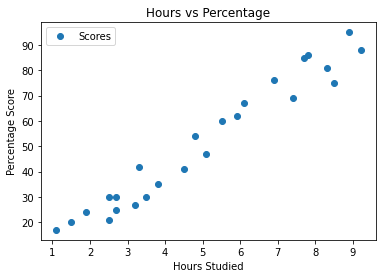

In [9]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

## Train Test Split

In [10]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [11]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

## Model Building

In [12]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


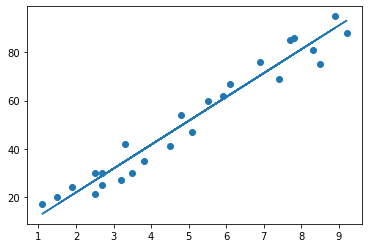

In [13]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Prediction

In [17]:
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Making a prediction on given data point.

In [19]:
# Predicting score for 9.25 hours
own_pred = regressor.predict(np.array([9.25]).reshape(1, 1)) #Had to reshape because it was not taking a scalar number

In [20]:
own_pred #Result of Prediction

array([93.69173249])

## Evaluation
Mean Absolute Error is a metric used to evaluate a Linear Regression model.
Mean Absolute Error shows that there is 4.18% error in the model's prediction.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
